# EDA for the Minerva Roads Hackathon
This EDA will try to load in an play with the newly acquired road data from Minerva 

In [4]:
# Load in the data and inspect in
import geopandas as gpd
import pandas as pd
import seaborn as sn
from pathlib import Path


# Load a shape file of world lakes as a GeoDataFrame:
path = Path('C:\\Users\\mlind\\github\\Minerva_hackathon\\data\\split segments\\road_merge_split_08112023.shp')
roman_roads: gpd.GeoDataFrame = gpd.read_file(path)
print(roman_roads.head(3))
roman_roads_length_gpd = gpd.GeoDataFrame(
    data={"length" : roman_roads["geometry"].length, "name" : roman_roads["name"]},
    geometry=roman_roads["geometry"]
)



# roman_roads_length_gpd["geometry"] = roman_roads["geometry"]
# roman_roads_length_gpd["length"] = roman_roads_length_gpd["geometry"].length


   OBJECTID  Id                 Name  Route_Type       Type  Lower_Date  \
0         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   
1         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   
2         0   0  Fanum Fortunae-Rome           0  Main Road         0.0   

   Low_Date_E  Upper_Date  Up_Date_E Descriptio  ...    Segment_s Shape_Le_1  \
0           0         0.0          0       None  ...  Conjectured        0.0   
1           0         0.0          0       None  ...  Conjectured        0.0   
2           0         0.0          0       None  ...  Conjectured        0.0   

   GeoJson     Shape_Le_2 Source Length  Notes ORIG_FID  ORIG_SEQ  \
0     None  356120.055513   None    0.0   None        0         1   
1     None  356120.055513   None    0.0   None        0         4   
2     None  356120.055513   None    0.0   None        0         5   

                                            geometry  
0  LINESTRING (1448922.974 5411758.148, 144864

          length                                           geometry
0  144071.867661  LINESTRING (1448922.974 5411758.148, 1448648.0...
1   98678.644750  LINESTRING (1393279.923 5209929.068, 1393489.0...
2    6998.572509  LINESTRING (1387773.098 5122916.212, 1387965.8...


<Axes: ylabel='length'>

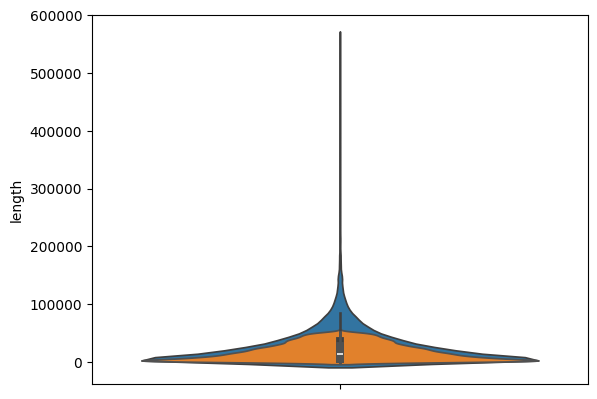

In [5]:
print(roman_roads_length_gpd.head(3))
sn.violinplot(roman_roads_length_gpd["length"])
roman_roads_length_gpd_85: pd.Series = roman_roads_length_gpd["length"][roman_roads_length_gpd["length"].between(roman_roads_length_gpd["length"].quantile(.05), roman_roads_length_gpd["length"].quantile(.85))]
sn.violinplot(roman_roads_length_gpd_85)


<Axes: ylabel='length'>

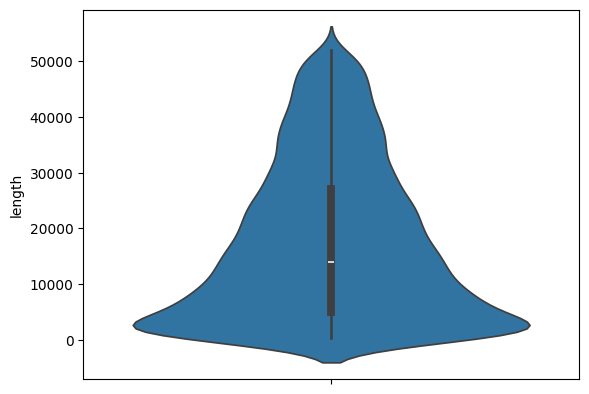

In [6]:
sn.violinplot(roman_roads_length_gpd_85)


              length
count     731.000000
mean   123851.249519
std     51076.718834
min     84337.071435
25%     93307.430456
50%    107298.028419
75%    136220.006474
max    562589.796583
            length                                           geometry
0    144071.867661  LINESTRING (1448922.974 5411758.148, 1448648.0...
1     98678.644750  LINESTRING (1393279.923 5209929.068, 1393489.0...
9    100195.167296  LINESTRING (1374692.527 5154877.218, 1374400.0...
10   100781.371168  LINESTRING (1337976.272 5263720.160, 1337752.7...
21   143724.062049  LINESTRING (1871500.847 4892232.991, 1869336.5...
58    88604.450989  LINESTRING (1359044.193 5500212.635, 1358690.1...
67    84496.142947  LINESTRING (2006933.571 4864572.869, 2006449.7...
128   84337.071435  LINESTRING (1474874.271 5027262.366, 1474708.0...
132  124747.554770  LINESTRING (1835957.382 4797598.693, 1836286.3...
142  118284.029400  LINESTRING (1807828.959 4582530.042, 1806218.5...


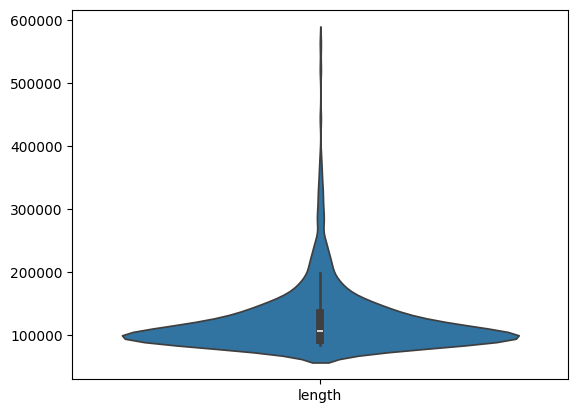

In [12]:
# Some of the outliers are extreme. We need to look at them an figure out
#   Where an what they are
#   If they are artefacts or proper roads segments
#   What sort of units they are in

roman_roads_length_gpd_85_outliers = roman_roads_length_gpd[roman_roads_length_gpd["length"].between(roman_roads_length_gpd["length"].quantile(.95), roman_roads_length_gpd["length"].quantile(1))]
sn.violinplot(roman_roads_length_gpd_85_outliers)
print(roman_roads_length_gpd_85_outliers.describe())
roman_roads_length_gpd_85_outliers.sort_values(by="length")
print(roman_roads_length_gpd_85_outliers.head(10))